# Exercise 3: Image segmentation

In this exercise we will segment cells using a membrane label.

1. Load the image below which contains in one channel a membrane label and in a second channel a nuclear label.

Image shape is (2, 256, 256)


Text(0.5, 1.0, 'DAPI')

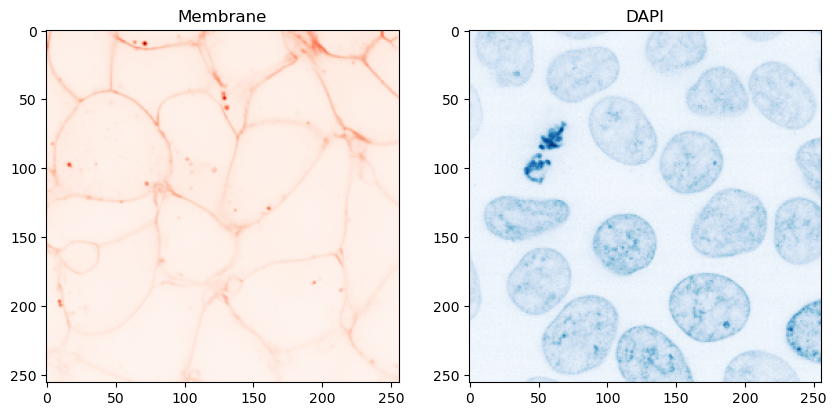

In [10]:
# import cells3d from skimage

import numpy as np
import skimage
import matplotlib.pyplot as plt
from scipy import ndimage

im = skimage.io.imread('images/skimage_cells_plane_30.tif')
print('Image shape is', im.shape)

im_mem = im[0]
im_dapi = im[1]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(im_mem, cmap='Reds')
axs[0].set_title('Membrane')
axs[1].imshow(im_dapi, cmap='Blues')
axs[1].set_title('DAPI')

The cells can not be easily segmented using thresholding, but the membrane signal labels the boundaries of the cells. 

Therefore, we will try to use the membrane signal for a watershed segmentation. To initialize the watershed, we will try to use the nuclei as markers.



2. Obtain nuclear markers by filtering, thresholding and getting the local maxima of the distance transform.

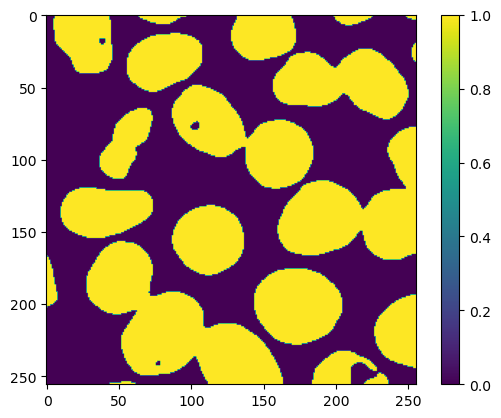

In [11]:
im_dapi_g = skimage.filters.gaussian(im_dapi, sigma=3)
im_dapi_th = im_dapi_g > skimage.filters.threshold_otsu(im_dapi_g)

plt.imshow(im_dapi_th)
plt.colorbar()

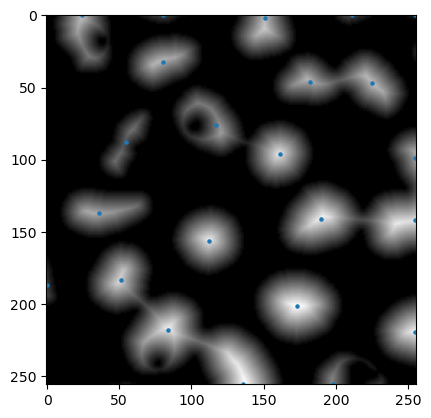

In [12]:
dist = ndimage.distance_transform_edt(im_dapi_th)

coords = skimage.feature.peak_local_max(
    skimage.filters.gaussian(dist, 10), exclude_border=False)

plt.imshow(dist, cmap='gray')
plt.scatter(coords[:, 1], coords[:, 0], s=5)

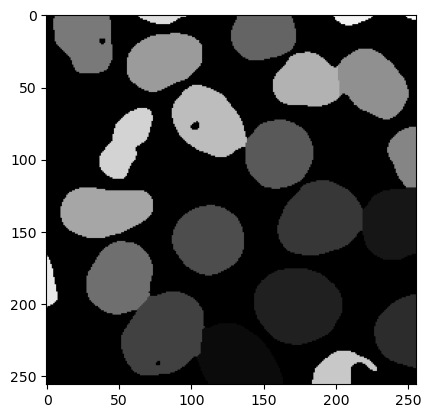

In [13]:
markers = np.zeros(im_dapi_th.shape, dtype='uint8')
for i in range(len(coords)):
    markers[coords[i, 0], coords[i, 1]] = i + 1

labels = skimage.segmentation.watershed(-dist, markers, mask=im_dapi_th)
nuclei_markers = labels

plt.imshow(nuclei_markers, cmap='gray')

3. Perform a watershed segmentation using the membrane signal and the nuclear markers.

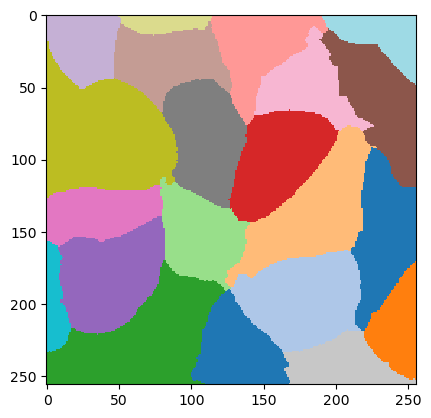

In [14]:
labels = skimage.segmentation.watershed(im_mem, nuclei_markers)

plt.imshow(labels, cmap='tab20', interpolation='none')


4. Use `skimage.segmentation.find_boundaries` to visualize the segmentation results.

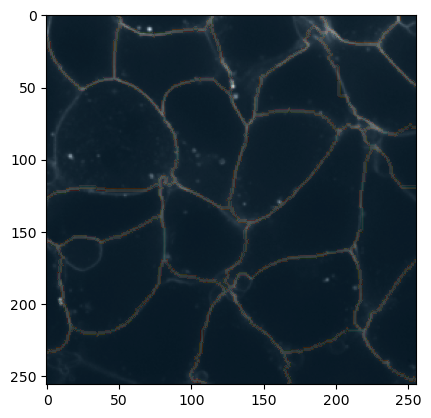

In [15]:
plt.imshow(im_mem, cmap='gray')
plt.imshow(skimage.segmentation.find_boundaries(labels), cmap='tab20', alpha=0.2)